In [28]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [23]:
X.loc[]

sepal length (cm)    4.9
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 1, dtype: float64

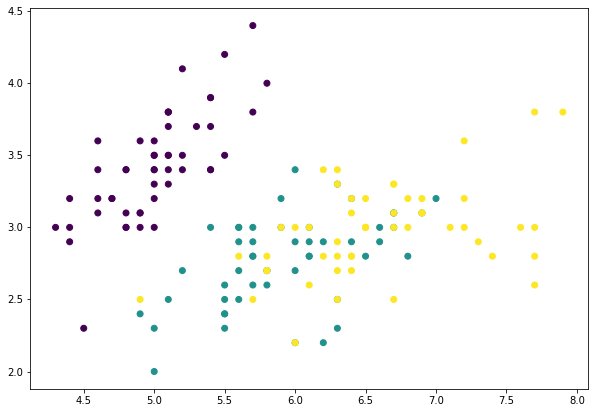

In [27]:
fig = plt.figure(figsize = (10,7))

plt.scatter('sepal length (cm)', 'sepal width (cm)', data = X, c = y)
plt.show()

In [8]:
X,y = load_iris(return_X_y = True, as_frame = True)

In [29]:
pca = PCA(n_components = 2)

In [30]:
pipe1 = Pipeline([
    ("scaler", StandardScaler())
])

In [31]:
pipe1.fit(X)

Pipeline(steps=[('scaler', StandardScaler())])

In [37]:
x = pca.fit_transform(X)

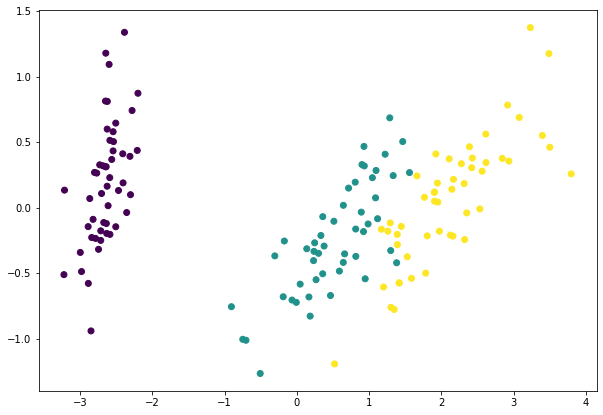

In [43]:
fig = plt.figure(figsize = (10,7))

plt.scatter(x[:,0], x[:,1], c = y)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2)

In [118]:
model = LogisticRegression(max_iter = 10000)

In [49]:
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
pred = model.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [61]:
confusion_matrix(pred, y_test)

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  3,  7]])

In [62]:
accuracy_score(pred, y_test)

0.8666666666666667

In [63]:
accuracy_score(model.predict(x_train), y_train)

0.975

In [123]:
c = np.linspace(0,1,10)
c

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [124]:
search = GridSearchCV(estimator = model, param_grid = {'C':c}, cv = 5, refit = True)

In [125]:
search.fit(x_train, y_train)

/home/mikey/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/home/mikey/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:300: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
/home/mikey/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:352: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
/home/mikey/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [126]:
import pandas as pd

In [127]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019035,0.001654,0.000918,0.000184,0.0,{'C': 0.0},0.333333,0.333333,0.333333,0.291667,0.333333,0.325000,0.016667,10
1,0.006779,0.000283,0.000489,0.000022,0.111111,{'C': 0.1111111111111111},0.916667,1.000000,0.916667,0.958333,0.958333,0.950000,0.031180,9
2,0.007240,0.000266,0.000485,0.000010,0.222222,{'C': 0.2222222222222222},0.916667,1.000000,0.958333,0.958333,1.000000,0.966667,0.031180,3
3,0.009749,0.002489,0.000918,0.000528,0.333333,{'C': 0.3333333333333333},0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,6
4,0.010933,0.001846,0.000616,0.000099,0.444444,{'C': 0.4444444444444444},0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,6
5,0.009361,0.000449,0.000483,0.000008,0.555556,{'C': 0.5555555555555556},0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,6
6,0.009001,0.000565,0.000483,0.000016,0.666667,{'C': 0.6666666666666666},0.916667,1.000000,1.000000,0.916667,1.000000,0.966667,0.040825,4
7,0.009037,0.000425,0.000524,0.000091,0.777778,{'C': 0.7777777777777777},0.916667,1.000000,1.000000,0.916667,1.000000,0.966667,0.040825,4
8,0.009188,0.000685,0.000490,0.000032,0.888889,{'C': 0.8888888888888888},0.916667,1.000000,1.000000,0.958333,1.000000,0.975000,0.033333,1
9,0.009470,0.000662,0.000500,0.000029,1.0,{'C': 1.0},0.916667,1.000000,1.000000,0.958333,1.000000,0.975000,0.033333,1


In [128]:
pred = search.predict(x_test)

In [129]:
accuracy_score(pred, y_test)

0.8666666666666667

In [130]:
accuracy_score(search.predict(x_train), y_train)

0.975

In [131]:
search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=10000),
 'n_jobs': None,
 'param_grid': {'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [133]:
from sklearn.decomposition import IncrementalPCA

In [140]:
ipca = IncrementalPCA(n_components = 2)

In [141]:
ipca.fit(X)

IncrementalPCA(n_components=2)

In [142]:
x = ipca.transform(X)

In [143]:
x.shape

(150, 2)

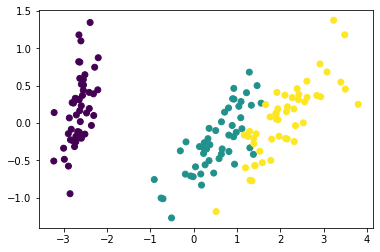

In [144]:
plt.scatter(x[:,0], x[:,1], c = y)

In [145]:
from sklearn.datasets import load_digits

In [146]:
logistic = LogisticRegression()
pca = PCA()

In [149]:
pipe2 = Pipeline(
    steps = [('pca', pca),('logistic', logistic)]
)

In [150]:
X_digits, y_digits = load_digits(return_X_y = True)

In [151]:
pca.fit(X_digits)

PCA()

In [154]:
pca.explained_variance_

(64,)

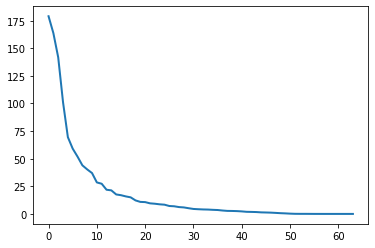

In [160]:
plt.plot(pca.explained_variance_, lw = 2)

In [157]:
v = np.arange(50)

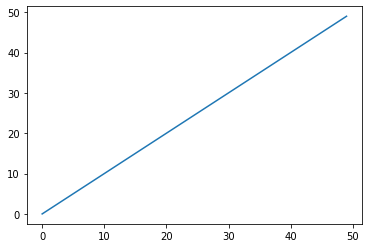

In [158]:
plt.plot(v)

In [161]:
from sklearn.datasets import load_digits

In [162]:
X, y = load_digits(return_X_y = True)

In [168]:
data = load_digits()

In [214]:
images = data.images
labels = data.target_names

images_and_labels = list(zip(images, labels))

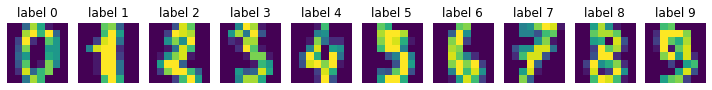

In [215]:
fig, axis = plt.subplots(1,10, figsize = (10,5))

for ax, (image,label) in zip(axis,images_and_labels):
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('label %s'%label)
    plt.tight_layout()